# Бэггинг и случайный лес

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [70]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, X, y, cv=10)
print(cv_score.shape)
print(np.mean(cv_score))

(10,)
0.8319118559900682


In [14]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(model, n_estimators=100)
cv_score_bag = cross_val_score(bag_clf, X, y, cv=10)
print(cv_score_bag.shape)
print(np.mean(cv_score_bag))

(10,)
0.9209404096834264


In [15]:
bag_model1 = BaggingClassifier(clf, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cv_score_bag1 = cross_val_score(bag_model1, X, y, cv=10)
print(cv_score_bag1.shape)
print(np.mean(cv_score_bag1))

(10,)
0.9326536312849163


In [76]:
clf_random = DecisionTreeClassifier(random_state=37, max_features=int(np.sqrt(X.shape[1])))
bag_model2 = BaggingClassifier(clf_random, random_state=11, n_estimators=100, bootstrap=False)
cv_score_bag2 = cross_val_score(bag_model2, X, y, cv=10)
cv_score_tree = cross_val_score(clf_random, X, y, cv=10)
print(np.mean(cv_score_bag2))
print(np.mean(cv_score_tree))

0.9527063935443824
0.7535195530726256


In [63]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
cv_score_rfc = cross_val_score(clf_rfc, X, y, cv=10)
print(np.mean(cv_score_rfc))

0.9504531346989447


In [21]:
num_trees = np.arange(1, 200, 10)
num_features = np.arange(1, X.shape[1]+1, 1)
depths = np.arange(1, 100, 5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'Score')

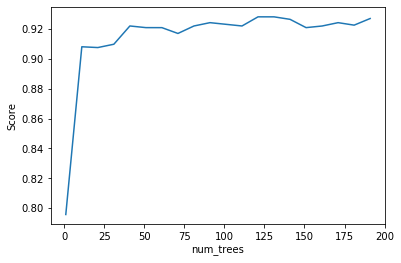

In [43]:
a = []
nn = 0
for i in num_trees:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best')
    temp_model = BaggingClassifier(temp_tree, n_estimators=i)
    temp_score = cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))

plt.plot(num_trees, a)
plt.xlabel("num_trees")
plt.ylabel("Score")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


Text(0, 0.5, 'Score')

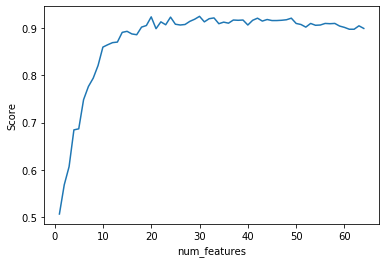

In [44]:
nn = 0
for i in num_features:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_features=i)
    temp_model = BaggingClassifier(temp_tree, max_features=i)
    temp_score = cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))
    
plt.plot(num_features, a[num_trees.shape[0]:])
plt.xlabel("num_features")
plt.ylabel("Score")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'Score')

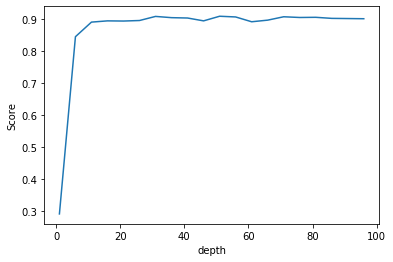

In [60]:
nn = 0
b = []
for i in depths:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_depth=i)
    temp_model = BaggingClassifier(temp_tree)
    temp_score = cross_val_score(temp_model, X, y, cv=10)
    b.append(np.mean(temp_score))
    
plt.plot(depths, b)
plt.xlabel("depth")
plt.ylabel("Score")

In [16]:
import pandas as pd

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
df = pd.read_csv('../training_mush.csv')

In [32]:
X = df.drop(columns='class')
y = df['class']

In [74]:
clf_rf = RandomForestClassifier(random_state=0)

In [75]:
parametrs = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 
             'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)}

In [76]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [36]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [39]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [40]:
best_clf = grid_search_cv_clf.best_estimator_

In [41]:
best_clf.score(X, y)

1.0

In [42]:
feature_importances = best_clf.feature_importances_

In [43]:
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})

In [44]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


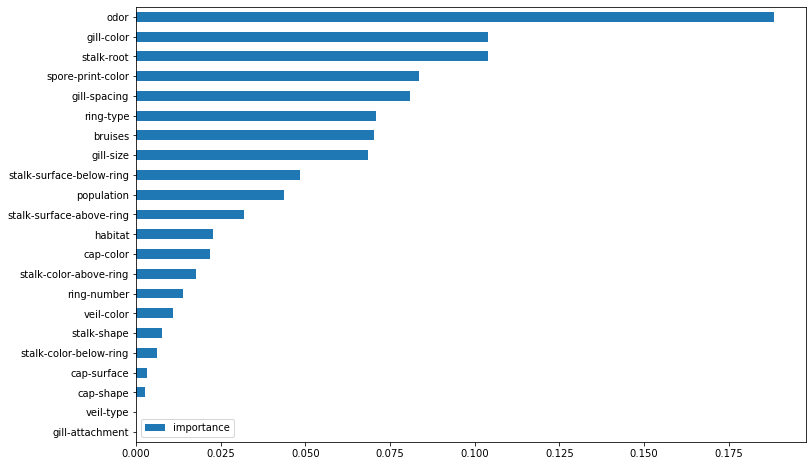

In [45]:
imp = pd.DataFrame(feature_importances, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [47]:
df_test = pd.read_csv('../testing_mush.csv')

In [48]:
df_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [49]:
y_pred = best_clf.predict(df_test)

In [58]:
y_true = pd.read_csv('../testing_y_mush.csv')

In [59]:
y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


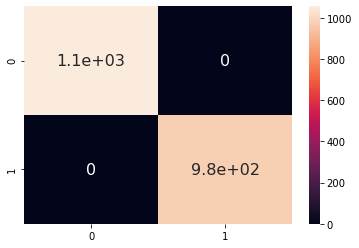

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 16})

In [66]:
invasion_df = pd.read_csv('../invasion.csv')

In [67]:
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}

In [69]:
y_train = invasion_df['class'].map(transport)

In [72]:
X_train = invasion_df.drop(columns='class')

In [73]:
X_train

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [77]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [78]:
invasion_df_test = pd.read_csv('../operative_information.csv')

In [80]:
best_clf = grid_search_cv_clf.best_estimator_


In [81]:
y_pred = best_clf.predict(invasion_df_test)

In [84]:
pd.Series(y_pred).value_counts()

1    675
0    595
2    230
dtype: int64

In [85]:
feature_importances = best_clf.feature_importances_

In [87]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [88]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [90]:
space_invasion = pd.read_csv('../space_can_be_a_dangerous_place.csv')

In [92]:
space_invasion.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


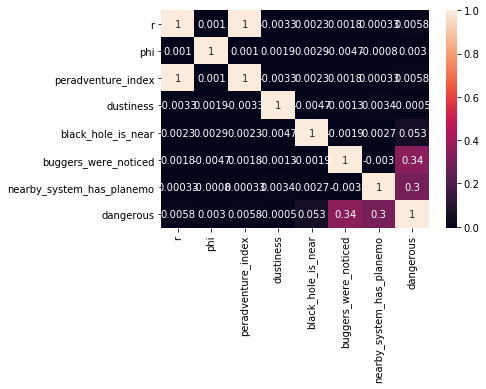

In [93]:
sns.heatmap(space_invasion.corr(), annot=True)